In [1]:
from diff_calc import mathLexer
from diff_parse import mathParser
from diff_plotter import plot, show
import matplotlib.pyplot as plt
from IPython.display import display

Parser debugging for mathParser written to parser.out


In [73]:
expression = "def f(x) {x+1}  {diff x} { sin(x) } tan(x)"

# как добавить diff_arg в код, и как считывать его
# нужно ли обрабатывать нули и 1 и где это делать

In [74]:
lexer  = mathLexer()
parser = mathParser()

In [75]:
for token in lexer.tokenize(expression):
    print(token)

Token(type='DEF', value='def', lineno=1, index=0)
Token(type='ID', value='f', lineno=1, index=4)
Token(type='(', value='(', lineno=1, index=5)
Token(type='ID', value='x', lineno=1, index=6)
Token(type=')', value=')', lineno=1, index=7)
Token(type='{', value='{', lineno=1, index=9)
Token(type='ID', value='x', lineno=1, index=10)
Token(type='PLUS', value='+', lineno=1, index=11)
Token(type='NUMBER', value=1, lineno=1, index=12)
Token(type='}', value='}', lineno=1, index=13)
Token(type='{', value='{', lineno=1, index=16)
Token(type='DIFF', value='diff', lineno=1, index=17)
Token(type='ID', value='x', lineno=1, index=22)
Token(type='}', value='}', lineno=1, index=23)
Token(type='{', value='{', lineno=1, index=25)
Token(type='SIN', value='sin', lineno=1, index=27)
Token(type='(', value='(', lineno=1, index=30)
Token(type='ID', value='x', lineno=1, index=31)
Token(type=')', value=')', lineno=1, index=32)
Token(type='}', value='}', lineno=1, index=34)
Token(type='TAN', value='tan', lineno=1, 

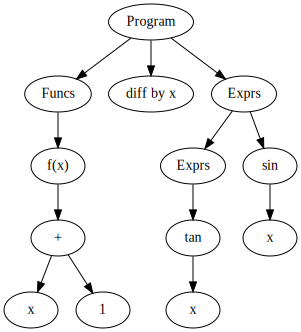

In [76]:
result = parser.parse(lexer.tokenize(expression))
result.dot

In [77]:
result.exprs.expr.funcs

{'f': <ast_nodes.Func at 0x2e5af5c8>}

In [78]:
result.funcs.func

In [79]:
exec_result = result.exec()

In [80]:
exec_result['python_exprs']

['(tan(x))', '(sin(x))']

In [81]:
exec_result['diff_exprs']

['1/(cos(x))**2', 'cos(x)']

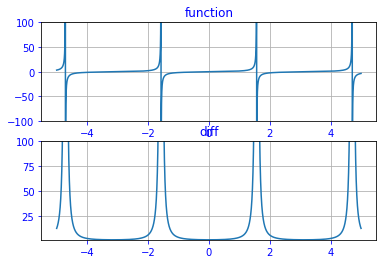

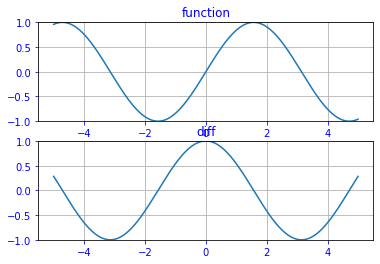

In [82]:
import math
for i in range(0,len(exec_result['python_exprs'])):
    init = exec_result['python_exprs'][i]
    diff_init = exec_result['diff_exprs'][i]
    a, b = -5, 5
    init_plot = plot(init,a,b)
    diff_plot = plot(diff_init,a,b)
    show(init_plot,diff_plot)
